In [2]:
!pip install pandas-datareader   #pandas data reader

In [11]:
!pip install --upgrade pandas_datareader


In [14]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 943.5 kB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 4.4 MB/s eta 0:00:00
  Created wheel for frozendict: filename=frozendict-2.4.0-py3-none-any.whl size=15425 sha256=96b5db258f6d17290287edec02aa4aa02e7ed67c8f8c28fe6324201b66af1b7a
  Stored in directory: /User

In [61]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [62]:
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [63]:
#to read the data we need api key but we can read without key also, let's see 
#pdr.get_data_yahoo('META') ,this is not working
symbol = 'TSLA'

# Fetch historical data
df = yf.download(symbol, start='2017-02-27', end='2024-01-24')


[*********************100%%**********************]  1 of 1 completed


In [64]:
df.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-12,215.330002,219.300003,211.509995,217.240005,217.240005,66860700
2022-03-25,336.000000,340.600006,332.440002,336.880005,336.880005,62031600
2020-03-30,34.017334,34.443333,32.748669,33.475334,33.475334,179971500
2019-08-27,14.382667,14.586667,14.135333,14.272000,14.272000,81243000
2018-05-21,18.755333,19.432667,18.753332,18.966000,18.966000,137739000


<Axes: xlabel='Date'>

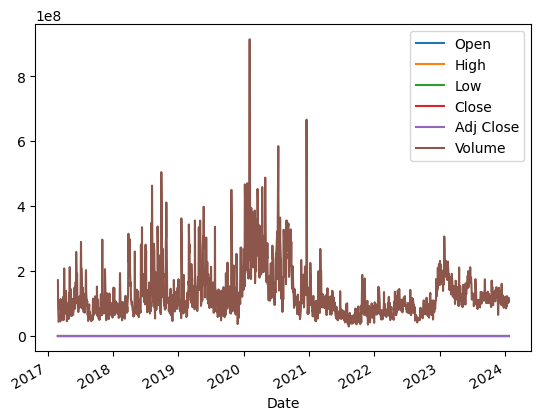

In [65]:
#let's plot all the values
# the following plot will not give very clear observation of the stock price,
#to get better outlook of the data let's plot every column values
df.plot()  

<Axes: xlabel='Date'>

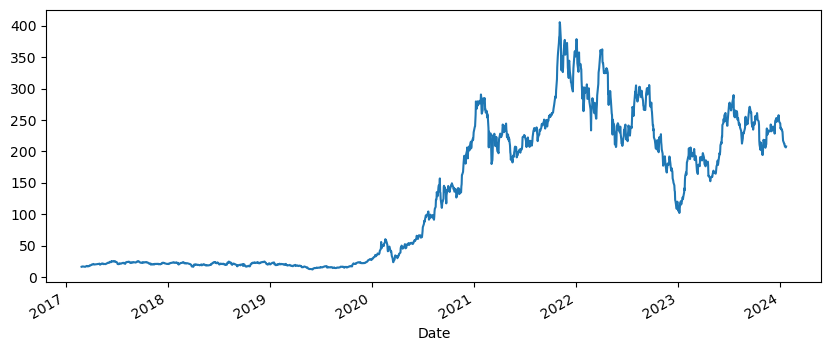

In [66]:
df['Low'].plot(figsize=(10,4))

<Axes: xlabel='Date'>

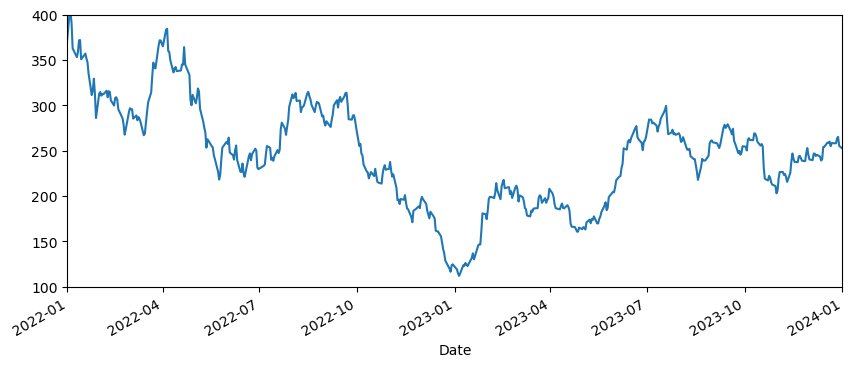

In [67]:
df['High'].plot(xlim=['2022-01-01','2024-01-01'],ylim=[100,400],figsize=(10,4))

<Axes: xlabel='Date'>

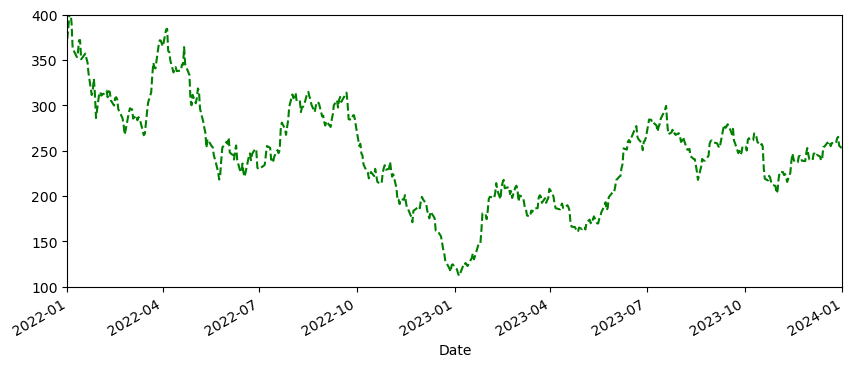

In [68]:
df['High'].plot(xlim=['2022-01-01','2024-01-01'],ylim=[100,400],figsize=(10,4),c='green',ls='--')

In [69]:
df.index

DatetimeIndex(['2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06', '2017-03-07', '2017-03-08',
               '2017-03-09', '2017-03-10',
               ...
               '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
               '2024-01-16', '2024-01-17', '2024-01-18', '2024-01-19',
               '2024-01-22', '2024-01-23'],
              dtype='datetime64[ns]', name='Date', length=1738, freq=None)

In [70]:
df.iloc[:4,:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000


In [71]:
index=df.loc["2017-02-28":"2017-10-28"].index
opening_share=df.loc["2017-02-28":"2017-10-28"]['Open']

In [72]:
opening_share

Date
2017-02-28    16.279333
2017-03-01    16.945333
2017-03-02    16.647333
2017-03-03    16.716000
2017-03-06    16.527332
                ...    
2017-10-23    23.325333
2017-10-24    22.586666
2017-10-25    22.446667
2017-10-26    21.851999
2017-10-27    21.316668
Name: Open, Length: 170, dtype: float64

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline

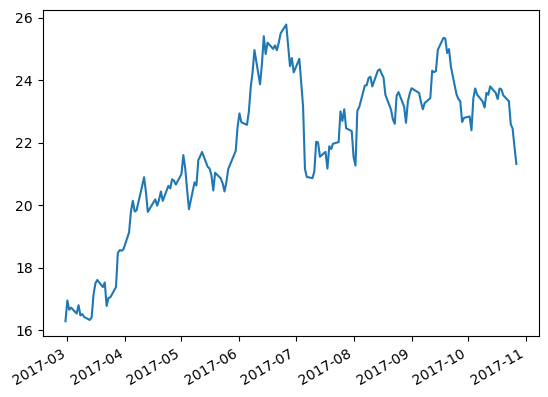

In [74]:
figure,axis=plt.subplots()
figure.autofmt_xdate() #to avoid overlapping on x axis
axis.plot(index,opening_share)

In [75]:
#datetime column
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
1,2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2,2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
3,2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
4,2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1738 non-null   datetime64[ns]
 1   Open       1738 non-null   float64       
 2   High       1738 non-null   float64       
 3   Low        1738 non-null   float64       
 4   Close      1738 non-null   float64       
 5   Adj Close  1738 non-null   float64       
 6   Volume     1738 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 95.2 KB


In [78]:
df=df.set_index('Date',drop=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000


In [85]:
##datetime data
datetime(2024,1,18)
date=datetime.now()

In [88]:
date.day

4

In [92]:
date.weekday()

6

In [94]:
df.resample(rule='A').min()
df.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,296.040009,299.290009,289.519989,293.339996,293.339996,306590600
2024-12-31,250.080002,251.250000,244.410004,248.419998,248.419998,122889000


<Axes: xlabel='Date'>

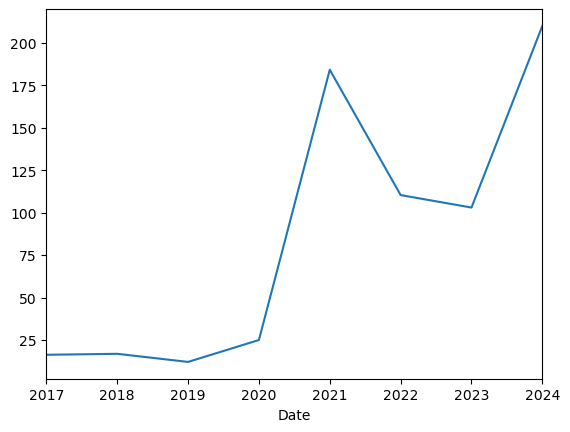

In [98]:
#give year and frequency
df.resample(rule='A').min()['Open'].plot()

<Axes: xlabel='Date'>

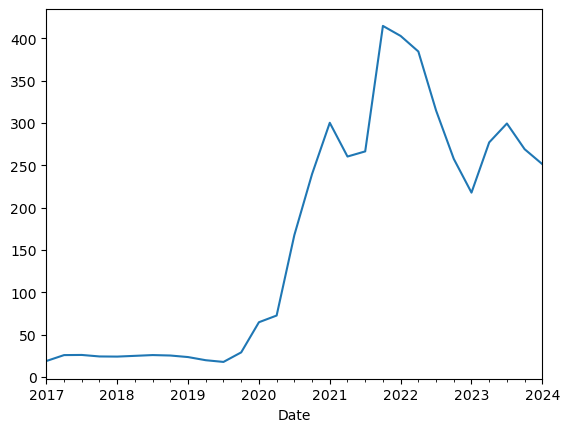

In [102]:
#quarterly start frequency
df.resample(rule='QS').max()['High'].plot()

In [106]:
##Buisness and frequency
df.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-30,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-29,296.040009,299.290009,289.519989,293.339996,293.339996,306590600
2024-12-31,250.080002,251.250000,244.410004,248.419998,248.419998,122889000


In [108]:
df.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.582001,18.799999,18.480667,18.553333,18.553333,171912000
2017-04-03,25.779333,25.799334,25.290001,25.563334,25.563334,258921000
2017-07-03,25.350000,25.974001,25.178667,25.666668,25.666668,289867500
2017-10-02,23.798668,24.200001,23.608667,23.976667,23.976667,296871000
2018-01-01,24.000000,24.033333,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000


<Axes: xlabel='Date'>

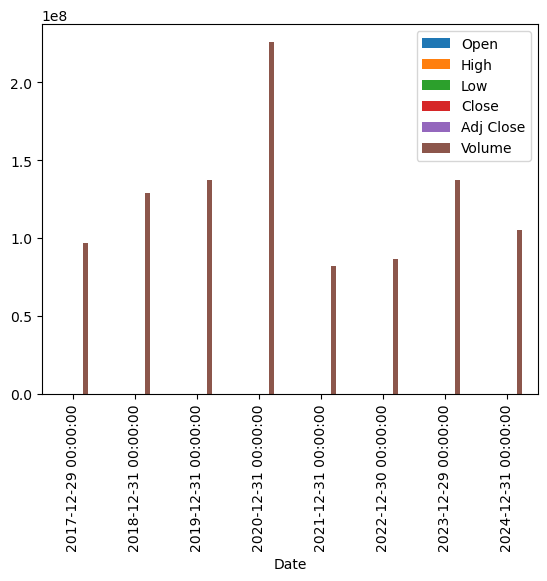

In [111]:
df.resample(rule='BA').mean().plot(kind='bar')

<Axes: xlabel='Date'>

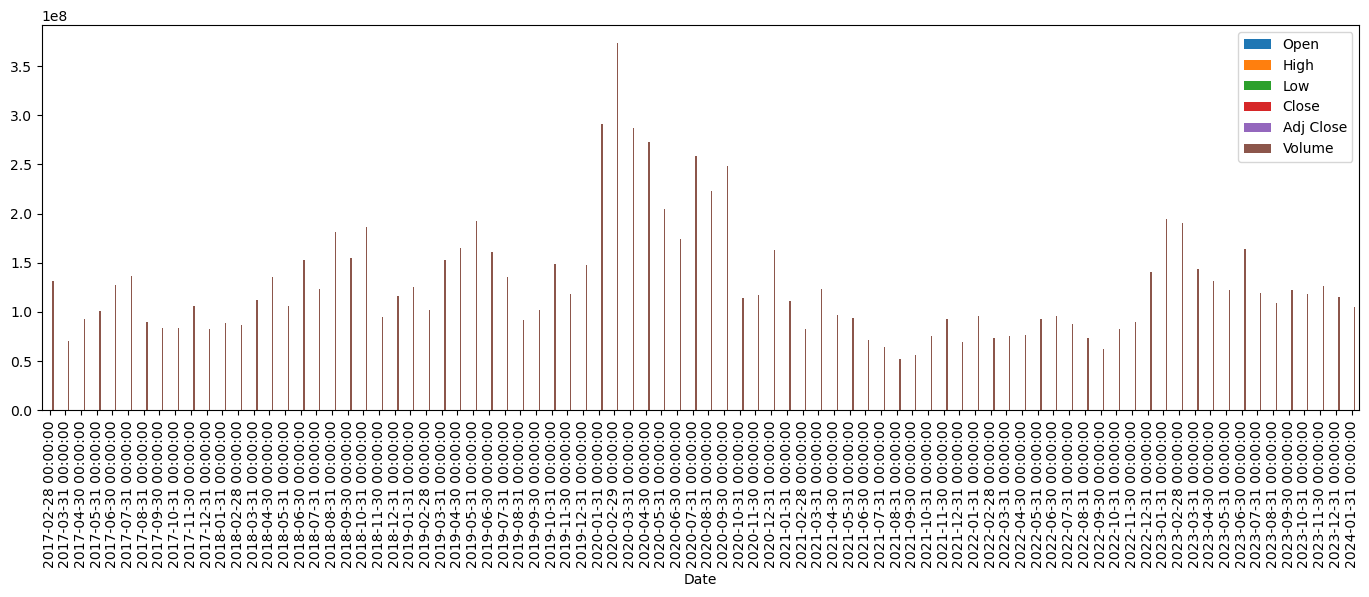

In [113]:
df.resample(rule='M').mean().plot(kind='bar',figsize=(17,5))

In [117]:
df['Low'].rolling(11).mean().head(20)  , #rolliong can be used for smothening the data 

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13    16.377091
2017-03-14    16.401394
2017-03-15    16.464242
2017-03-16    16.524545
2017-03-17    16.602909
2017-03-20    16.662424
2017-03-21    16.678970
2017-03-22    16.692243
2017-03-23    16.740606
2017-03-24    16.813394
Name: Low, dtype: float64

In [136]:
df['40 day rolling']=df['Open'].rolling(30).mean()


In [137]:
df.head(34)

,Open,High,Low,Close,Adj Close,Volume,Open:10 day rolling,10 day rolling,30 day rolling,40 day rolling
Date,,,,,,,,,,
2017-02-27,16.544666,16.557333,16.134001,16.415333,16.415333,171912000,NaN,NaN,NaN,NaN
2017-02-28,16.279333,16.733334,16.260000,16.666000,16.666000,91171500,NaN,NaN,NaN,NaN
2017-03-01,16.945333,16.990000,16.607332,16.667999,16.667999,72142500,NaN,NaN,NaN,NaN
2017-03-02,16.647333,16.885332,16.551332,16.698668,16.698668,50277000,NaN,NaN,NaN,NaN
2017-03-03,16.716000,16.793333,16.600000,16.771334,16.771334,43791000,NaN,NaN,NaN,NaN
2017-03-06,16.527332,16.780001,16.500668,16.747334,16.747334,50332500,NaN,NaN,NaN,NaN
2017-03-07,16.794666,16.926001,16.554667,16.572666,16.572666,51892500,NaN,NaN,NaN,NaN
2017-03-08,16.466667,16.671333,16.354668,16.458000,16.458000,55878000,NaN,NaN,NaN,NaN
2017-03-09,16.508667,16.577333,16.200001,16.326668,16.326668,58189500,NaN,NaN,NaN,NaN


<Axes: xlabel='Date'>

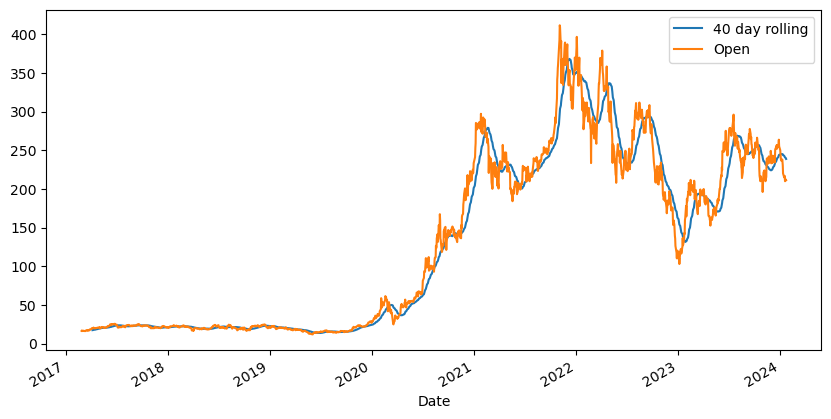

In [139]:
df[["40 day rolling","Open"]].plot(figsize=(10,5))  #smoothening of the data